In [1]:
import pandas as pd  # pandas module for data manipulation
import matplotlib.pyplot as plt # module for plotting
import seaborn as sns # another module for plotting
import numpy as np
from sklearn.naive_bayes import GaussianNB #Import Library of Gaussian Naive Bayes model
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler #fot standardidazation
from sklearn.model_selection import GridSearchCV #import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

plt.style.use('ggplot')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# let's load the dataset
df = pd.read_csv('liver_disease_1.csv')
# let's inspect the first 5 rows
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


## Performing EDA

In [3]:
# mean, max & min across each attribute
df.describe()
# Describe function provides us min, max and mean of all the attributes in the dataset.

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [4]:
# Checking the datatypes. so that we can modify them according to other dataset.
df.dtypes

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                        object
dtype: object

In [5]:
df.shape

(583, 10)

In [6]:
# we can quantify the total number of missing values using
# the isnull method plus the sum method on the dataframe
df.isna().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [7]:
# For the better evaluation we are replacing categorical values to numerical values
df["Dataset"] = df["Dataset"].replace("Yes",1)
df["Dataset"] = df["Dataset"].replace("No",0)

# replacing those attributes which has NAN values to the mean of that column.
for column in df:
    if column not in ("Dataset"):
        df[column] = df[column].replace(0,np.NaN)
        mean = int(df[column].mean(skipna=True))
        df[column]=df[column].replace(np.NaN, mean)

In [8]:
df.isna().sum()


Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

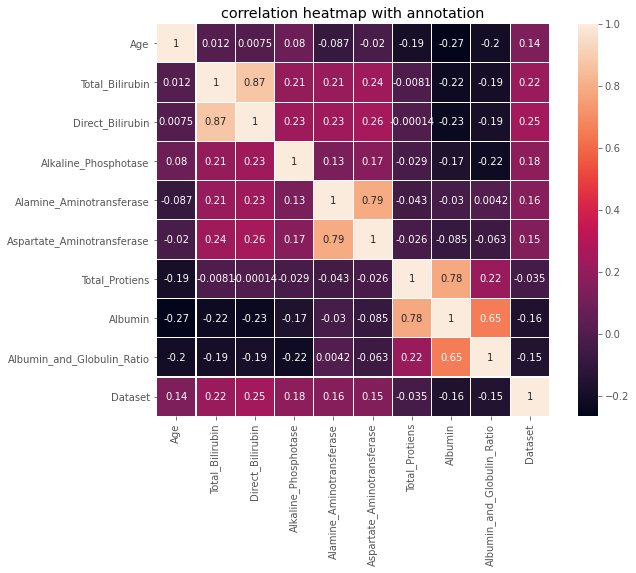

In [9]:
# taking the number of columns in a dataframe
n=df.shape[1]
# Defining the plot size 
fig, axs = plt.subplots(figsize = (8, 12))
# specifying some more attributes to adjust the heat map
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.2)
plt.subplot(2, 1, 1)
# correlation heatmap with annotation
sns.heatmap(df.corr(), linewidths = 0.1, square = True, annot = True)
plt.ylim(n, 0)
plt.xlim(0, n)
plt.title("correlation heatmap with annotation")
plt.show()

#### As we can see the correlation between any two attributes is maximum of 43% i.e., between age and Pregnancies.<br />We can clearly say that all the attributes are independent of each other and we can consider all of them to furthur process

In [10]:
#creating arrays for attributes and class
X = df.drop('Dataset',axis=1)
y = df['Dataset'].values

In [11]:
# Scaling the Data so that computations will be much faster and also easily understood by machine while computing
column_names = X.columns
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=column_names)

In [12]:
# Splitting data into test and train sets 
# Stratify = y is used to split the training and testing data sets uniformly
# we are splitting training and testing data sets into 70-30 ratio.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

# Naive Bayes Implementation

In [13]:
#Create a Gaussian Classifier
NBmodel = GaussianNB()

# Train the model using the training sets 
NBmodel.fit(X_train, y_train)

GaussianNB()

In [14]:
#Predict on test data
y_pred_NB = NBmodel.predict(X_test)

In [15]:
# predictions using the GaussianNB classifier that we fit in the above steps
confusion_matrix(y_test,y_pred_NB)

array([[49,  1],
       [70, 55]], dtype=int64)

In [16]:
# We have a method in pandas library to find confusion matrix. corsstab. 
pd.crosstab(y_test, y_pred_NB, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,49,1,50
1,70,55,125
All,119,56,175


In [22]:
print('F1 Score: {:2f}%'.format(f1_score(y_test, y_pred_NB)*100))
print('Accuracy: {:2f}%'.format(accuracy_score(y_test, y_pred_NB)*100))
print('AUC: {:2f}%'.format(roc_auc_score(y_test, y_pred_NB)*100))
print('Training Set Score: {:2f}%'.format(NBmodel.score(X_train, y_train)*100))
print('Testing Set Score: {:2f}%'.format(NBmodel.score(X_test, y_test)*100))
print(classification_report(y_test, y_pred_NB))

F1 Score: 60.773481%
Accuracy: 59.428571%
AUC: 71.000000%
Training Set Score: 52.941176%
Testing Set Score: 59.428571%
              precision    recall  f1-score   support

           0       0.41      0.98      0.58        50
           1       0.98      0.44      0.61       125

    accuracy                           0.59       175
   macro avg       0.70      0.71      0.59       175
weighted avg       0.82      0.59      0.60       175



# Logistic Regression Implementation

In [18]:
c_values = list(np.arange(1,100))
strat_k_fold = StratifiedKFold(n_splits=10)
parameters_grid = [
     {
        'C':c_values,
        'multi_class':['ovr'],
        'penalty':['l2'],
        'solver':['liblinear','newton-cg','lbfgs'],
        'random_state':[42]    
    },
    {
        'C':c_values,
        'multi_class':['ovr'],
        'penalty':['l1'],
        'solver':['liblinear'],
        'random_state':[42]
    },
  
]

grid=GridSearchCV(
    LogisticRegression(),
    param_grid = parameters_grid,
    cv=strat_k_fold,
    scoring="f1"
)
best_lr = grid.fit(X,y)
best_lr.fit(X_train,y_train)

log_reg_predict = best_lr.predict(X_test)
# log_reg_predict
log_reg_predict_prob = best_lr.predict_proba(X_test)[:,-1]
# log_reg_predict_prob

In [23]:
print('F1 Score: {:2f}%'.format(f1_score(y_test, log_reg_predict)*100))
print('Accuracy: {:2f}%'.format(accuracy_score(y_test, log_reg_predict)*100))
print('AUC: {:2f}%'.format(roc_auc_score(y_test, log_reg_predict_prob)*100))
print('Training Set Score: {:2f}%'.format(best_lr.score(X_train, y_train)*100))
print('Testing Set Score: {:2f}%'.format(best_lr.score(X_test, y_test)*100))
print(classification_report(y_test, log_reg_predict))


F1 Score: 83.802817%
Accuracy: 73.714286%
AUC: 77.616000%
Training Set Score: 83.614089%
Testing Set Score: 83.802817%
              precision    recall  f1-score   support

           0       0.62      0.20      0.30        50
           1       0.75      0.95      0.84       125

    accuracy                           0.74       175
   macro avg       0.69      0.58      0.57       175
weighted avg       0.71      0.74      0.69       175



In [20]:
# predictions using the LR classifier that we fit in the above steps
confusion_matrix(y_test,log_reg_predict)

array([[ 10,  40],
       [  6, 119]], dtype=int64)

In [21]:
# We have a method in pandas library to find confusion matrix. corsstab. 
pd.crosstab(y_test, log_reg_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,10,40,50
1,6,119,125
All,16,159,175
